# Project 2: An Analysis of FEMA Disaster Declaration and Aid Given
### Data Source:
https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2
This data is from FEMA, it shows declared disaster events from 1953 to the present, as well as descriptions of those events and the type of aid FEMA contributed. I downloaded this data on March 24th, 2021. 
### Hypothesis: 
I predict that the amount of individual assistance programs will be inversely proportional to the frequency of declared disasters and that local government programs will increase. I also believe the assistance for individuals and government have declined since COVID-19 was declared an emergency.

#### Data Preparation

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('DisasterDeclarationsSummaries.csv')
df.head(10)

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-05-02T00:00:00.000Z,1954-06-01T00:00:00.000Z,13,0,0,Statewide,53013,bbe78045bc2c18eabea13bd70bdd3fc8,2021-02-05T19:01:21.734Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00.000Z,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,...,1953-05-15T00:00:00.000Z,1958-01-01T00:00:00.000Z,48,0,0,Statewide,53003,fa79c2a0c1dd09facb9729ead357b422,2021-02-05T19:01:21.736Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06T00:00:00.000Z,1953,Flood,FLOODS,0,1,...,1953-06-06T00:00:00.000Z,1955-12-01T00:00:00.000Z,30,0,0,Statewide,53006,f044c01fd5da9d437f5ddd208ed59126,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-11T00:00:00.000Z,1956-06-01T00:00:00.000Z,25,0,0,Statewide,53009,2689d48c5b648a64a2960d740f8a0c0f,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11T00:00:00.000Z,1953,Flood,FLOOD,0,1,...,1953-06-11T00:00:00.000Z,1955-11-01T00:00:00.000Z,19,0,0,Statewide,53008,0272b5fe94beed25334abef8adb43896,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb434e
5,DR-9-TX,9,TX,DR,1953-06-19T00:00:00.000Z,1953,Flood,FLOOD,0,1,...,1953-06-19T00:00:00.000Z,1958-01-01T00:00:00.000Z,48,0,0,Statewide,53010,ed5ad5416fc07811f02d52dbd01b9516,2021-02-05T19:01:21.738Z,5f7b2be031a8c6681cfb4351
6,DR-3-LA,3,LA,DR,1953-05-29T00:00:00.000Z,1953,Flood,FLOOD,0,1,...,1953-05-29T00:00:00.000Z,1960-02-01T00:00:00.000Z,22,0,0,Statewide,53005,ea34416dba7705f78eeee6356736ee3e,2021-02-05T19:01:21.736Z,5f7b2be031a8c6681cfb4354
7,DR-4-MI,4,MI,DR,1953-06-02T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-02T00:00:00.000Z,1956-02-01T00:00:00.000Z,26,0,0,Statewide,53004,6bd9033a7634aa10b6fb455ddb40143c,2021-02-05T19:01:21.736Z,5f7b2be031a8c6681cfb4357
8,DR-6-MI,6,MI,DR,1953-06-09T00:00:00.000Z,1953,Tornado,TORNADO,0,1,...,1953-06-09T00:00:00.000Z,1956-03-30T00:00:00.000Z,26,0,0,Statewide,53007,337fa5dcfb766fef1e4be708e657d3bc,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb435a
9,DR-11-NH,11,NH,DR,1953-07-02T00:00:00.000Z,1953,Fire,FOREST FIRE,0,1,...,1953-07-02T00:00:00.000Z,1956-02-01T00:00:00.000Z,33,0,0,Statewide,53011,cb902d222cbcaba99cda2c5a2ab26e04,2021-02-05T19:01:21.738Z,5f7b2be031a8c6681cfb435d


In [2]:
# https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
# This allows me to see all of the columns in my dataframe
pd.set_option('display.max_columns', None)
df

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00.000Z,1953,Tornado,TORNADO,0,1,1,1,1953-05-02T00:00:00.000Z,1953-05-02T00:00:00.000Z,1954-06-01T00:00:00.000Z,13,0,0,Statewide,53013,bbe78045bc2c18eabea13bd70bdd3fc8,2021-02-05T19:01:21.734Z,5f7b2be031a8c6681cfb4342
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00.000Z,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15T00:00:00.000Z,1953-05-15T00:00:00.000Z,1958-01-01T00:00:00.000Z,48,0,0,Statewide,53003,fa79c2a0c1dd09facb9729ead357b422,2021-02-05T19:01:21.736Z,5f7b2be031a8c6681cfb4345
2,DR-5-MT,5,MT,DR,1953-06-06T00:00:00.000Z,1953,Flood,FLOODS,0,1,1,1,1953-06-06T00:00:00.000Z,1953-06-06T00:00:00.000Z,1955-12-01T00:00:00.000Z,30,0,0,Statewide,53006,f044c01fd5da9d437f5ddd208ed59126,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb4348
3,DR-7-MA,7,MA,DR,1953-06-11T00:00:00.000Z,1953,Tornado,TORNADO,0,1,1,1,1953-06-11T00:00:00.000Z,1953-06-11T00:00:00.000Z,1956-06-01T00:00:00.000Z,25,0,0,Statewide,53009,2689d48c5b648a64a2960d740f8a0c0f,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb434b
4,DR-8-IA,8,IA,DR,1953-06-11T00:00:00.000Z,1953,Flood,FLOOD,0,1,1,1,1953-06-11T00:00:00.000Z,1953-06-11T00:00:00.000Z,1955-11-01T00:00:00.000Z,19,0,0,Statewide,53008,0272b5fe94beed25334abef8adb43896,2021-02-05T19:01:21.737Z,5f7b2be031a8c6681cfb434e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61429,DR-4590-LA,4590,LA,DR,2021-03-09T10:08:00.000Z,2021,Severe Ice Storm,SEVERE WINTER STORMS,1,0,1,1,2021-02-11T11:25:28.000Z,2021-02-19T23:00:00.000Z,NaN,22,73,99073,Ouachita (Parish),21015,427a3a9eb874af5c65342ad70fe6a37c,2021-03-09T17:22:07.539Z,6047aebf460b6fb83e30374a
61430,DR-4590-LA,4590,LA,DR,2021-03-09T10:08:00.000Z,2021,Severe Ice Storm,SEVERE WINTER STORMS,1,0,1,1,2021-02-11T11:25:28.000Z,2021-02-19T23:00:00.000Z,NaN,22,65,99065,Madison (Parish),21015,f10f3670fad293191043b7b67c0af496,2021-03-09T17:22:07.537Z,6047aebf460b6fb83e303748
61431,DR-4590-LA,4590,LA,DR,2021-03-09T10:08:00.000Z,2021,Severe Ice Storm,SEVERE WINTER STORMS,1,0,1,1,2021-02-11T11:25:28.000Z,2021-02-19T23:00:00.000Z,NaN,22,69,99069,Natchitoches (Parish),21015,5f313a0277b9bc4aaf9491e3f586a77f,2021-03-09T17:22:07.538Z,6047aebf460b6fb83e30374c
61432,DR-4590-LA,4590,LA,DR,2021-03-09T10:08:00.000Z,2021,Severe Ice Storm,SEVERE WINTER STORMS,1,0,1,1,2021-02-11T11:25:28.000Z,2021-02-19T23:00:00.000Z,NaN,22,79,99079,Rapides (Parish),21015,d6cdc597582fc20c524eb4ca97f9151b,2021-03-09T17:22:07.539Z,6047aebf460b6fb83e303754


In [3]:
# https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
# I selected here the 10 columns I want to use to make my analysis
fema = df[['disasterNumber', 'declarationType', 'fyDeclared', 'incidentType','ihProgramDeclared','iaProgramDeclared','paProgramDeclared','hmProgramDeclared', 'designatedArea', 'declarationRequestNumber']].copy()
fema = fema.set_index('disasterNumber')
fema

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber
disasterNumber,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013
2,DR,1953,Tornado,0,1,1,1,Statewide,53003
5,DR,1953,Flood,0,1,1,1,Statewide,53006
7,DR,1953,Tornado,0,1,1,1,Statewide,53009
8,DR,1953,Flood,0,1,1,1,Statewide,53008
...,...,...,...,...,...,...,...,...,...
4590,DR,2021,Severe Ice Storm,1,0,1,1,Ouachita (Parish),21015
4590,DR,2021,Severe Ice Storm,1,0,1,1,Madison (Parish),21015
4590,DR,2021,Severe Ice Storm,1,0,1,1,Natchitoches (Parish),21015


The columns I have picked to look at describe the unique disaster number, the type of disaster, the year the disaster was declared, the incident type, a binary selection of type of aid, the location of the disaster response and a declaration request number.

I will first look at the unique disaster events per year.

In [4]:
# https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
n = len(pd.unique(fema['declarationRequestNumber']))
  
print("Number of unique disasters :", 
      n)

Number of unique disasters : 4522


In [5]:
# https://www.interviewqs.com/ddi-code-snippets/drop-duplicate-rows-pandas
# This drops values that describe the same disaster in different areas
unique = fema.drop_duplicates(subset='declarationRequestNumber', keep="first")
unique

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber
disasterNumber,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013
2,DR,1953,Tornado,0,1,1,1,Statewide,53003
5,DR,1953,Flood,0,1,1,1,Statewide,53006
7,DR,1953,Tornado,0,1,1,1,Statewide,53009
8,DR,1953,Flood,0,1,1,1,Statewide,53008
...,...,...,...,...,...,...,...,...,...
4587,DR,2021,Severe Ice Storm,1,0,1,1,Hughes (County),21014
4588,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21007
4589,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21010


In [6]:
# https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
unique.declarationType.unique()

array(['DR', 'FM', 'EM'], dtype=object)

The three designation above described at https://www.fema.gov/disasters/how-declared, are for Major Disaster: DM, which describe natural events that occur including fires, Fire Management: FM which is a specific category for Fire related events that include different grant regulations, and Emergency Declarations: EM, those include emergencies that don't fall under the others specified. The current COVID-19 Pandemic falls under DM.

I will be only looking at DM for my analysis of yearly events. This is because my hypothesis is based off global climate and I feel this would provide the most consistent data.

In [7]:
dr = unique[unique.declarationType == 'DR']
dr


,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber
disasterNumber,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013
2,DR,1953,Tornado,0,1,1,1,Statewide,53003
5,DR,1953,Flood,0,1,1,1,Statewide,53006
7,DR,1953,Tornado,0,1,1,1,Statewide,53009
8,DR,1953,Flood,0,1,1,1,Statewide,53008
...,...,...,...,...,...,...,...,...,...
4584,DR,2021,Fire,0,0,1,1,Colville Indian Reservation,20295
4587,DR,2021,Severe Ice Storm,1,0,1,1,Hughes (County),21014
4588,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21007


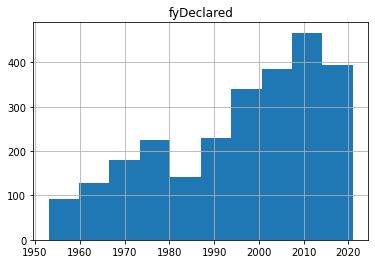

In [8]:
hist = dr.hist(column = 'fyDeclared', bins =10)

In [84]:
#https://stackoverflow.com/questions/31076698/create-a-pandas-dataframe-of-counts
# This allows me to take a look at the count per year of DR values
count = dr.fyDeclared.value_counts().reset_index().rename(
           columns={'index': 'Year', 0: 'Count'})
count = count.set_index('Year')
count = count.sort_index()
count = count.drop(2021)
count

# I decided to drop 2021 from this because the year has not been completed and will not represent the entire year
# We cannot simply multiply by the remaining months of the year because seasonality affects the number of potential disasters

,fyDeclared
Year,
1953,10
1954,14
1955,20
1956,18
1957,18
...,...
2016,41
2017,60
2018,57


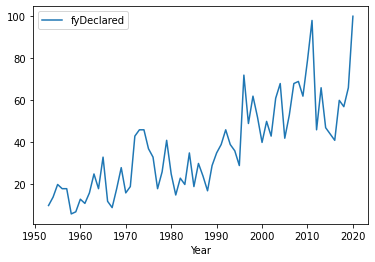

In [10]:
ct = count.plot.line()

In [11]:
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
#https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o
# This creates a copy of the DR dataframe then adds a new column that says if individual aid is given of any kind
aid = dr.copy()
aid['Individual'] = np.where(np.logical_or(aid['ihProgramDeclared'] == 1,  (aid['iaProgramDeclared']) == 1), 1, 0)
aid

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber,Individual
disasterNumber,,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013,1
2,DR,1953,Tornado,0,1,1,1,Statewide,53003,1
5,DR,1953,Flood,0,1,1,1,Statewide,53006,1
7,DR,1953,Tornado,0,1,1,1,Statewide,53009,1
8,DR,1953,Flood,0,1,1,1,Statewide,53008,1
...,...,...,...,...,...,...,...,...,...,...
4584,DR,2021,Fire,0,0,1,1,Colville Indian Reservation,20295,0
4587,DR,2021,Severe Ice Storm,1,0,1,1,Hughes (County),21014,1
4588,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21007,0


The IA and IH programs give money directly to individuals affected by a disaster. The PA program is given to local government to help for disaster relief, while the HM program is for hazard mitigation in response to disasters. I separated them as direct relief to individuals to government assistance.

In [12]:
aid.drop(aid[aid['Individual'] == 'No'].index, inplace = True)


In [13]:
y_aid = aid[aid['Individual'] == 1]
y_aid

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber,Individual
disasterNumber,,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013,1
2,DR,1953,Tornado,0,1,1,1,Statewide,53003,1
5,DR,1953,Flood,0,1,1,1,Statewide,53006,1
7,DR,1953,Tornado,0,1,1,1,Statewide,53009,1
8,DR,1953,Flood,0,1,1,1,Statewide,53008,1
...,...,...,...,...,...,...,...,...,...,...
4569,DR,2021,Fire,1,0,1,1,Fresno (County),20302,1
4571,DR,2021,Flood,1,0,0,0,Arecibo (Municipio),20315,1
4582,DR,2021,Biological,1,0,1,0,Navajo Nation Reservation (Also NM and UT),21006,1


In [14]:
aid_cnt = y_aid.fyDeclared.value_counts().reset_index().rename(
           columns={'index': 'Year', 0: 'Count'})
# This adds the missing value, when I first ran it, it was 67 columns instead of 68. There was no individual aid in 2016
# https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/
aid_cnt.loc[len(aid_cnt.index)] = [2016,0]
aid_cnt = aid_cnt.set_index('Year')
aid_cnt = aid_cnt.sort_index()
aid_cnt = aid_cnt.drop(2021)
# I used this to set to none to check the rows, but I change it back when finished
pd.set_option('display.max_rows',10)
aid_cnt


,fyDeclared
Year,
1953,10
1954,14
1955,20
1956,18
1957,18
...,...
2016,0
2017,8
2018,9


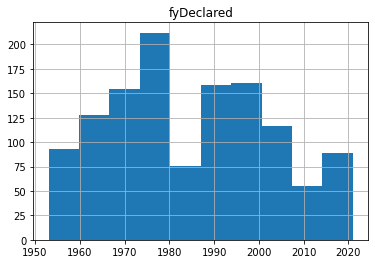

In [15]:
hist = y_aid.hist(column = 'fyDeclared', bins =10)

In [16]:
aid_cnt = aid_cnt.rename(columns={'fyDeclared': "Assistance"})
count = count.rename(columns={'fyDeclared' : 'Declared DR'})

In [17]:
merge = count.merge(aid_cnt, how='outer', left_index=True, right_index=True)
merge

,Declared DR,Assistance
Year,,
1953,10,10
1954,14,14
1955,20,20
1956,18,18
1957,18,18
...,...,...
2016,41,0
2017,60,8
2018,57,9


In [18]:
merge['Percent'] = merge['Assistance']/ merge['Declared DR']
merge

,Declared DR,Assistance,Percent
Year,,,
1953,10,10,1.000000
1954,14,14,1.000000
1955,20,20,1.000000
1956,18,18,1.000000
1957,18,18,1.000000
...,...,...,...
2016,41,0,0.000000
2017,60,8,0.133333
2018,57,9,0.157895


<AxesSubplot:xlabel='Year'>

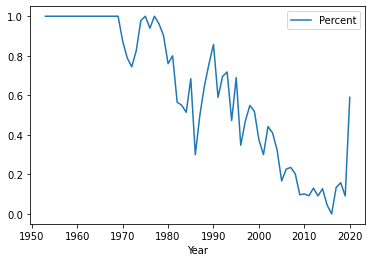

In [19]:
merge.plot.line(y = 'Percent')

<AxesSubplot:xlabel='Year'>

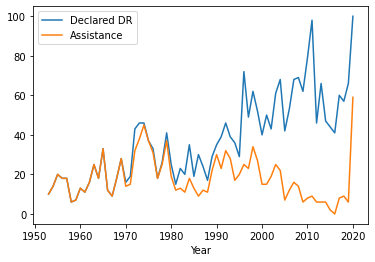

In [20]:
merge.plot.line(y = ['Declared DR', 'Assistance'])

In [21]:
# https://www.kite.com/python/answers/how-to-find-the-correlation-between-two-pandas-dataframe-columns-in-python
# This calculates correrlation between the columns in a dataframe
merge.corr()

,Declared DR,Assistance,Percent
Declared DR,1.000000,0.214307,-0.721798
Assistance,0.214307,1.000000,0.412425
Percent,-0.721798,0.412425,1.000000


In [22]:
# I dropped 2020 in order to see if how much the correlation would change.
merge2 = merge.drop(2020)
merge2.corr()

,Declared DR,Assistance,Percent
Declared DR,1.000000,0.060915,-0.768098
Assistance,0.060915,1.000000,0.470455
Percent,-0.768098,0.470455,1.000000


In [23]:
merge2 = merge.drop(2020)
# I dropped the first twenty years to notice a difference
merge2 = merge2.drop(merge.index[0:20])
merge2.corr()

,Declared DR,Assistance,Percent
Declared DR,1.000000,-0.096855,-0.622476
Assistance,-0.096855,1.000000,0.773578
Percent,-0.622476,0.773578,1.000000


In [24]:
# I looked at only the first 20 yeras
merge2 = merge.drop(merge.index[20:67])
merge2.corr()

,Declared DR,Assistance,Percent
Declared DR,1.000000,0.964955,-0.820026
Assistance,0.964955,1.000000,-0.700942
Percent,-0.820026,-0.700942,1.000000


The correlation functions uses a scale -1 to 1 to show the positive or negative correlation. I noticed generally the is no or weak correlation. The important correlation to look at is between Declared DR and Assitance. I noticed overall there is not a strong trend. It may be best to look at different time periods to notice differences. I noticed the first twenty years tehre is a very strong correlation of 0.965, this may mean that how they distributed aid has changed multiple times throughout its existance. I decided to omit 2020 because of the pandemic and the amount of aid seemed disproportionate to the recent years. Especially since in 2016 there was no aid given.

In [25]:
aid_all = dr.copy()
aid_all['Individual'] = np.where(np.logical_or(aid_all['ihProgramDeclared'] == 1,  (aid_all['iaProgramDeclared']) == 1), 1, 0)
aid_all['Government'] = np.where(np.logical_or(aid_all['paProgramDeclared'] == 1,  (aid_all['hmProgramDeclared']) == 1), 1, 0)
aid_all['Aid'] = np.where(np.logical_or(aid_all['Individual'] == 1,  (aid_all['Government']) == 1), 1, 0)
aid_all

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber,Individual,Government,Aid
disasterNumber,,,,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013,1,1,1
2,DR,1953,Tornado,0,1,1,1,Statewide,53003,1,1,1
5,DR,1953,Flood,0,1,1,1,Statewide,53006,1,1,1
7,DR,1953,Tornado,0,1,1,1,Statewide,53009,1,1,1
8,DR,1953,Flood,0,1,1,1,Statewide,53008,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4584,DR,2021,Fire,0,0,1,1,Colville Indian Reservation,20295,0,1,1
4587,DR,2021,Severe Ice Storm,1,0,1,1,Hughes (County),21014,1,1,1
4588,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21007,0,1,1


In [26]:
cov = aid_all.copy()
pre = cov.drop(cov.index[2472:])
pre

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber,Individual,Government,Aid
disasterNumber,,,,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013,1,1,1
2,DR,1953,Tornado,0,1,1,1,Statewide,53003,1,1,1
5,DR,1953,Flood,0,1,1,1,Statewide,53006,1,1,1
7,DR,1953,Tornado,0,1,1,1,Statewide,53009,1,1,1
8,DR,1953,Flood,0,1,1,1,Statewide,53008,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4475,DR,2020,Flood,0,0,1,1,Barnes (County),19106,0,1,1
4476,DR,2020,Tornado,0,0,1,1,Benton (County),20008,0,1,1
4477,DR,2020,Flood,0,0,1,1,Racine (County),20011,0,1,1


In [27]:
# This is post pandemic, dropping the pandemic related emergencies
pan = cov.drop(cov.index[:2472])
pan = pan[pan.incidentType != 'Biological']
pan

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber,Individual,Government,Aid
disasterNumber,,,,,,,,,,,,
4519,DR,2020,Flood,0,0,1,1,Union (County),20142,0,1,1
4536,DR,2020,Severe Storm(s),0,0,1,1,Bolivar (County),20165,0,1,1
4538,DR,2020,Severe Storm(s),0,0,1,1,Attala (County),20070,0,1,1
4539,DR,2020,Flood,0,0,1,1,Columbia (County),20108,0,1,1
4540,DR,2020,Severe Storm(s),0,0,1,1,Boyd (County),20134,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4584,DR,2021,Fire,0,0,1,1,Colville Indian Reservation,20295,0,1,1
4587,DR,2021,Severe Ice Storm,1,0,1,1,Hughes (County),21014,1,1,1
4588,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21007,0,1,1


In [28]:
pan['Aid'].value_counts()

1    53
Name: Aid, dtype: int64

In [29]:
pre['Aid'].value_counts()

1    2471
0       1
Name: Aid, dtype: int64

My second hypothesis is not really workable here. I was able to separate the values from post and prepandemic but it turns out that aid some sort of aid is usually given, barring one case before the pandemic for DRs.

In [30]:
pre['Individual'].value_counts()

0    1292
1    1180
Name: Individual, dtype: int64

In [31]:
pan['Individual'].value_counts()

0    45
1     8
Name: Individual, dtype: int64

In [32]:
pre['Government'].value_counts()

1    2233
0     239
Name: Government, dtype: int64

In [33]:
pan['Government'].value_counts()

1    52
0     1
Name: Government, dtype: int64

I looked further to see that my hypothesis is consistent with individual relief and that most disasters to receive some sort of relief. Whether the pandemic has lessened individual assistance due to lack of resources or if this a trend can be looked into further.

In [47]:
pre.corr()

,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,declarationRequestNumber,Individual,Government,Aid
fyDeclared,1.000000,0.211949,-0.690182,-0.017460,0.483962,-0.621275,-0.627391,0.090409,-0.011744
ihProgramDeclared,0.211949,1.000000,0.069420,-0.293378,0.238783,-0.275936,0.277103,0.070043,0.005327
iaProgramDeclared,-0.690182,0.069420,1.000000,-0.361991,-0.412873,0.511988,0.946179,-0.359051,0.018191
paProgramDeclared,-0.017460,-0.293378,-0.361991,1.000000,0.140672,-0.110040,-0.394384,0.782264,0.048102
hmProgramDeclared,0.483962,0.238783,-0.412873,0.140672,1.000000,-0.771060,-0.359774,0.339567,0.020880
declarationRequestNumber,-0.621275,-0.275936,0.511988,-0.110040,-0.771060,1.000000,0.460100,-0.297536,0.022988
Individual,-0.627391,0.277103,0.946179,-0.394384,-0.359774,0.460100,1.000000,-0.339589,0.019225
Government,0.090409,0.070043,-0.359051,0.782264,0.339567,-0.297536,-0.339589,1.000000,0.061491
Aid,-0.011744,0.005327,0.018191,0.048102,0.020880,0.022988,0.019225,0.061491,1.000000


In [48]:
pan.corr()

,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,declarationRequestNumber,Individual,Government,Aid
fyDeclared,1.000000,0.023905,NaN,0.067893,-0.258836,0.567616,0.023905,-0.146760,NaN
ihProgramDeclared,0.023905,1.000000,NaN,-0.580948,-0.182034,0.154898,1.000000,-0.328897,NaN
iaProgramDeclared,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paProgramDeclared,0.067893,-0.580948,NaN,1.000000,0.170176,0.082135,-0.580948,0.566139,NaN
hmProgramDeclared,-0.258836,-0.182034,NaN,0.170176,1.000000,-0.259007,-0.182034,0.388125,NaN
declarationRequestNumber,0.567616,0.154898,NaN,0.082135,-0.259007,1.000000,0.154898,0.012471,NaN
Individual,0.023905,1.000000,NaN,-0.580948,-0.182034,0.154898,1.000000,-0.328897,NaN
Government,-0.146760,-0.328897,NaN,0.566139,0.388125,0.012471,-0.328897,1.000000,NaN
Aid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
prepan = pre.append(pan)
prepan
# This creates a dataframe combining the other two without the pandemic information

,declarationType,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,designatedArea,declarationRequestNumber,Individual,Government,Aid
disasterNumber,,,,,,,,,,,,
1,DR,1953,Tornado,0,1,1,1,Statewide,53013,1,1,1
2,DR,1953,Tornado,0,1,1,1,Statewide,53003,1,1,1
5,DR,1953,Flood,0,1,1,1,Statewide,53006,1,1,1
7,DR,1953,Tornado,0,1,1,1,Statewide,53009,1,1,1
8,DR,1953,Flood,0,1,1,1,Statewide,53008,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4584,DR,2021,Fire,0,0,1,1,Colville Indian Reservation,20295,0,1,1
4587,DR,2021,Severe Ice Storm,1,0,1,1,Hughes (County),21014,1,1,1
4588,DR,2021,Severe Storm(s),0,0,1,1,Statewide,21007,0,1,1


In [52]:
prepan.corr()

,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,declarationRequestNumber,Individual,Government,Aid
fyDeclared,1.000000,0.212745,-0.696400,-0.009249,0.490590,-0.626207,-0.627165,0.096012,-0.010888
ihProgramDeclared,0.212745,1.000000,0.060911,-0.294726,0.232721,-0.273231,0.285027,0.065519,0.005348
iaProgramDeclared,-0.696400,0.060911,1.000000,-0.361917,-0.419069,0.518489,0.941107,-0.359886,0.017658
paProgramDeclared,-0.009249,-0.294726,-0.361917,1.000000,0.143992,-0.112781,-0.397690,0.780905,0.047961
hmProgramDeclared,0.490590,0.232721,-0.419069,0.143992,1.000000,-0.770362,-0.364368,0.341633,0.020982
declarationRequestNumber,-0.626207,-0.273231,0.518489,-0.112781,-0.770362,1.000000,0.462917,-0.299001,0.022555
Individual,-0.627165,0.285027,0.941107,-0.397690,-0.364368,0.462917,1.000000,-0.341106,0.018763
Government,0.096012,0.065519,-0.359886,0.780905,0.341633,-0.299001,-0.341106,1.000000,0.061418
Aid,-0.010888,0.005348,0.017658,0.047961,0.020982,0.022555,0.018763,0.061418,1.000000


There seems to be a slight negative correlation throughout the years for individual assistance. There is almost none for government and even less correlation for any aid given over time. It is hard to tell the affect of the pandemic on the correlation of individual assistance, when both correlation factors before and with all FEMA information are almost identical.